# Import relevant toolboxes

In [1]:
%matplotlib notebook                                           
import matplotlib.pyplot as plt                       # for plotting
import os                                             # for navigating folders
import pandas as pd                                   # for displaying final data table
from TFM_Image_registration import *                  # for aligning images
from TFM_displacement_tools import TFM_optical_flow   # for calculating substrate displacement
from TFM_tools import *                               # for calculating forces

### If performing image corrections

In [2]:
# read in flat field correction images
green_flatfield =io.imread('test_flatfield_images/488_flatfield.tif')
red_flatfield = io.imread('test_flatfield_images/561short_flatfield.tif')
farred_flatfield = io.imread('test_flatfield_images/640long_flatfield.tif')
darkfield_image = io.imread('test_flatfield_images/Prime_darkfield.tif')

## Run analysis in the correct directory

In [3]:
# switch to the test_cell directory
os.chdir('test_cell/')

## Register images

In [4]:
TFM_Image_registration(flatfield_correct = True, 
                       flatfield_images=[farred_flatfield,green_flatfield,red_flatfield],
                       darkfield_image=darkfield_image,
                       image_list = ['488.tif','561short.tif'])

# Calculate the displacements in the substrate

In [5]:
TFM_optical_flow(pyr_scale = 0.5, levels = 5, winsize = 8, iterations = 3, poly_n = 3, poly_sigma = 0.5)

## Perform FTTC calculation

<IPython.core.display.Javascript object>


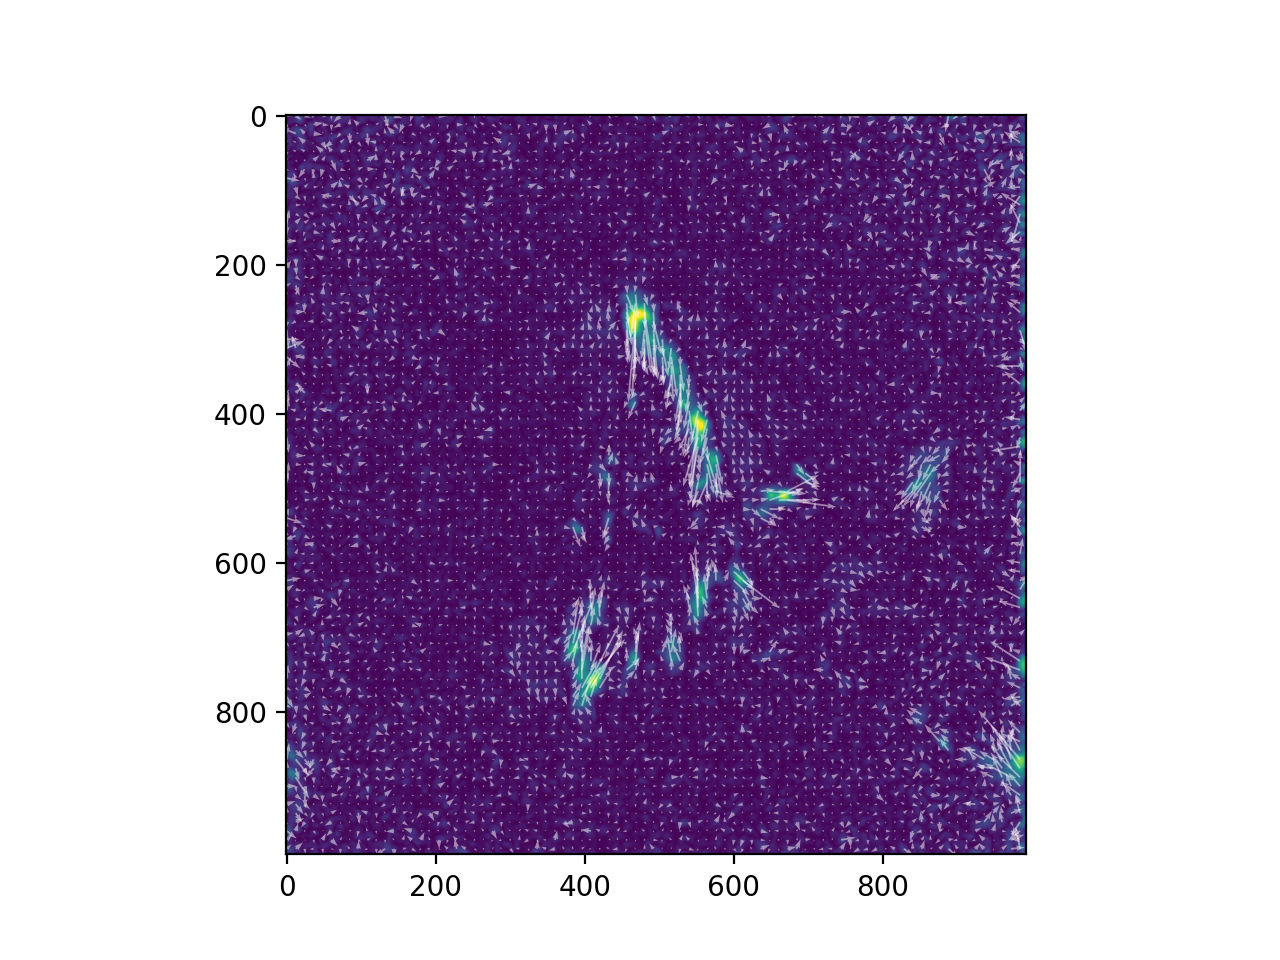

<IPython.core.display.Javascript object>


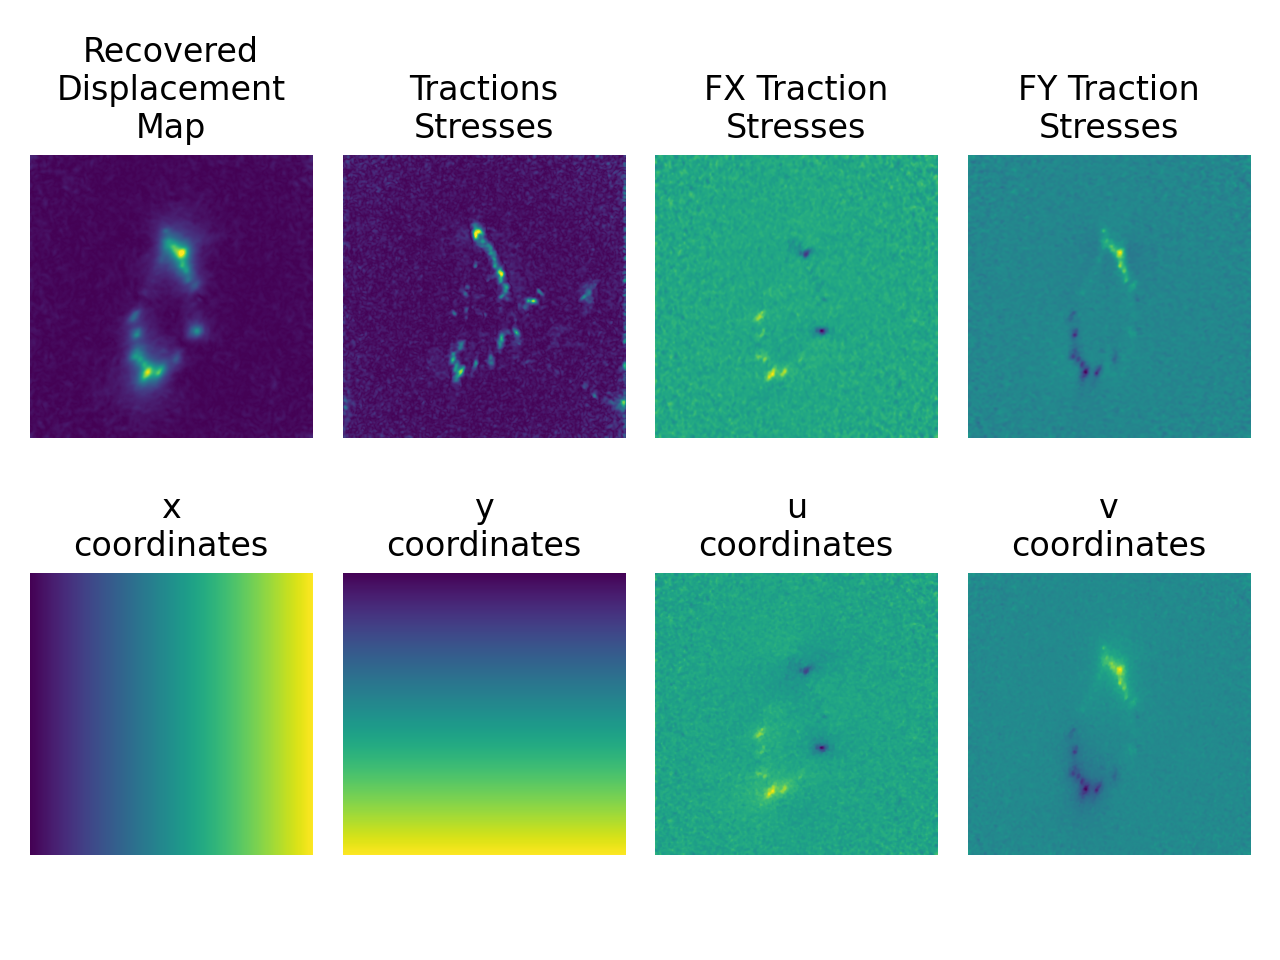

In [6]:
TFM_calculation(shear_modulus=16000, um_per_pixel=11./63, regparam = 1e-7, downsample = 12, timepoint = 1, check_figure=True)

## Create a mask to analyze forces only around the  cell

<IPython.core.display.Javascript object>


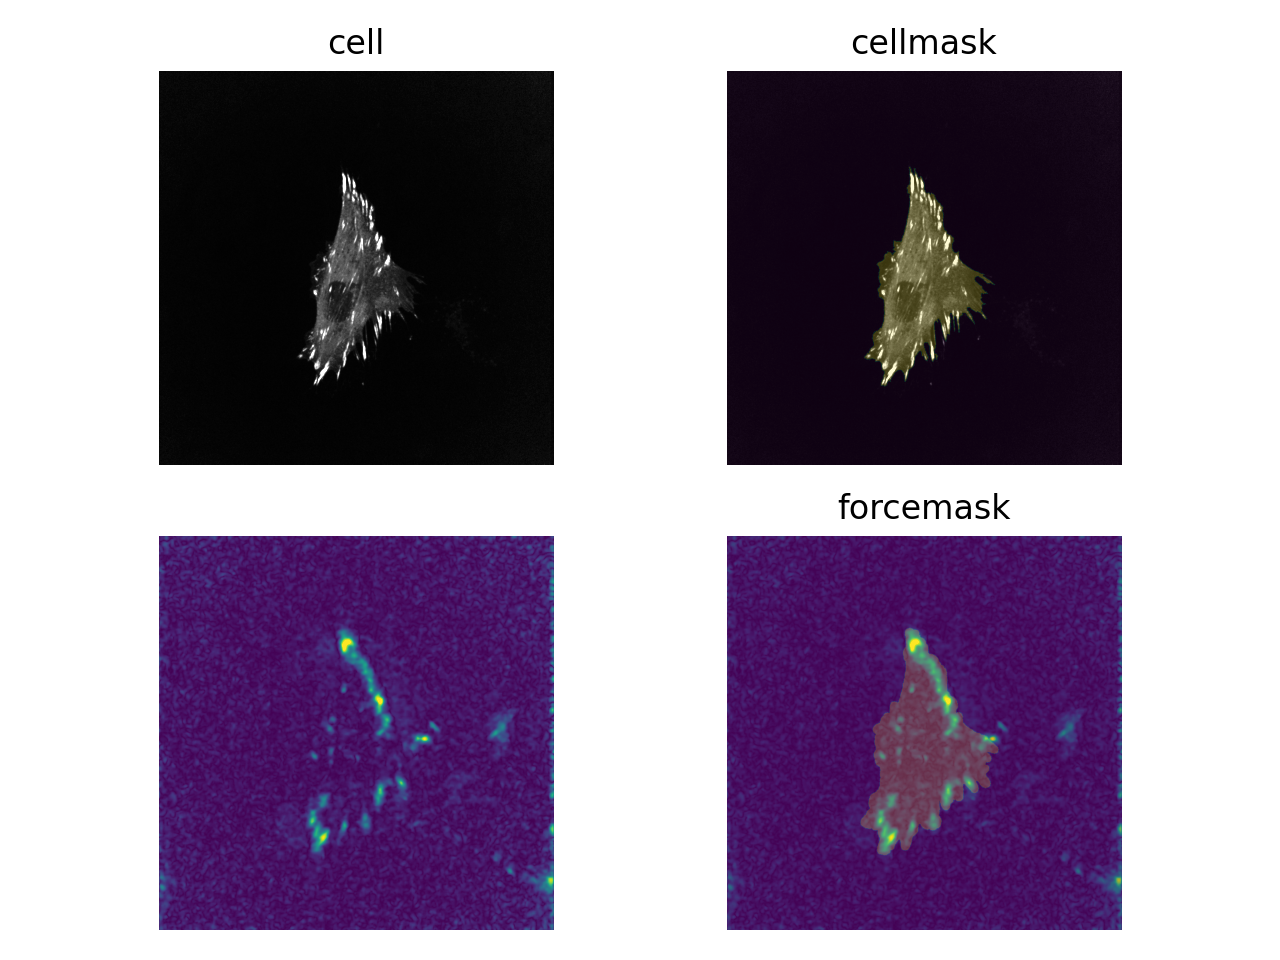

In [7]:
cellmask_stack, forcemask_stack, threshold = cellmask_threshold('561short_registered.tif', 
                                                                small_object_size=50, 
                                                                cell_minimum_area=50000, 
                                                                dilation_size = 10, 
                                                                save_figure=True, 
                                                                plot_figure=True, 
                                                                timepoint = 0)

## Calculate the strain energy and other relevant parameters

In [8]:
TFM_analysis()

## For displaying data

In [10]:
# read in data
data =  pd.read_csv('TFM_analysis.csv', index_col=0)

# display first 5 rows of data
data.head()

,time,cell_area_microns2,force_minimum,force_sum_Pa,displacement_sum,residual,energy_pJ,energy_per_area
0,0,2328.632653,0,58808456.0,98113.110,16.134358,0.287051,0.000123
1,1,2282.903250,0,38883210.0,60714.290,15.374872,0.112162,0.000049
2,2,2229.277904,0,22309930.0,24016.533,7.856894,0.019639,0.000009
3,3,2039.988662,0,19748284.0,21744.090,6.506141,0.015394,0.000008
4,4,1882.923406,0,14975615.0,14852.622,4.831392,0.007139,0.000004
